#### __SALES PREDICTION__

#### __1. Business Understanding__

**Problem Statement:** Sales prediction in business involves forecasting the volume of product purchases by customers, considering factors like advertising expenditure, target audience segmentation, and advertising platform selection. Data scientists play a pivotal role in this process by utilizing machine learning techniques in Python to analyze and interpret data, enabling informed decisions regarding advertising costs. By leveraging predictive models, businesses can optimize their advertising strategies and maximize sales potential, thereby necessitating a comprehensive exploration of sales prediction using machine learning in Python.

**Goal:** The business goal is to optimize advertising strategies and maximize sales potential through accurate sales prediction using machine learning techniques in Python.

**Hypothesis**


**Null Hypothesis (H0):** No significant evidence that advertising channels affect sales.

**Alternative Hypothesis (HA):** There is significant evidence that advertising channels affect sales.

#### __2. Data Understanding__

__2.1 Importation of Libraries__

In [26]:
# For Data Manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats

# For models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib


#For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For Filter Warnings
import warnings
warnings.filterwarnings("ignore")





__2.2 Data Loading__ 

In [2]:
sales_df = pd.read_csv(r'C:\Users\USER\Documents\Azubi Africa Class\CodSoft Internship\CODESOFT\Data SALES PREDICTION\advertising.csv')

__2.3 Exploratory Data Analysis(EDA)__

In [3]:
# Dataset Overview
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Number of columns and rows in sales_df
print (sales_df.shape)
print(f"There are {sales_df.shape[0]} rows, and {sales_df.shape[1]} columns")

(200, 4)
There are 200 rows, and 4 columns


In [5]:
# checking info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Describing the data
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [7]:
# checking for duplicates
print("There are ",sales_df.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [8]:
# Checking for missing values
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

__2.3.1 Univariate Analysis__

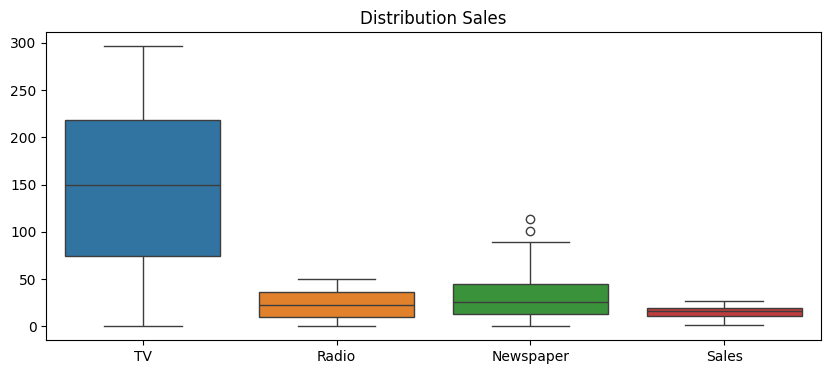

In [9]:
# A boxplot to check for outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=sales_df)
plt.title('Distribution Sales')
plt.show()

- Newspaper column has some outliers. 


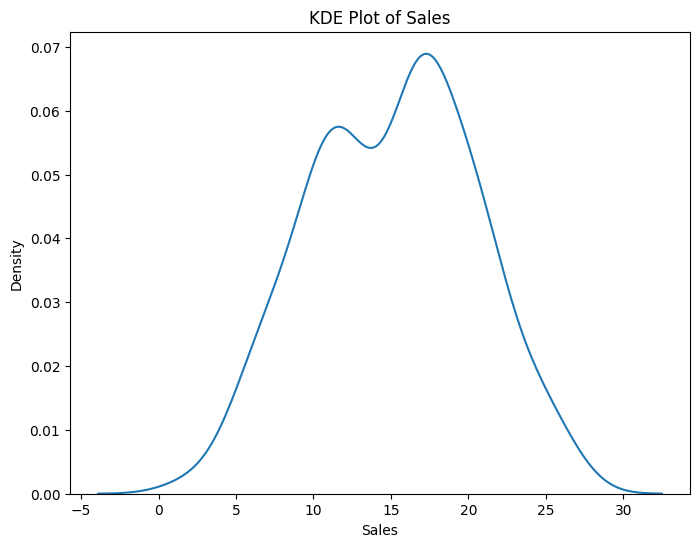

In [10]:
 
plt.figure(figsize=(8, 6))
sns.kdeplot(data=sales_df['Sales'])
plt.title('KDE Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

- The data has symmetrical distribution.

__2.3.2 Bivariate Analysis__

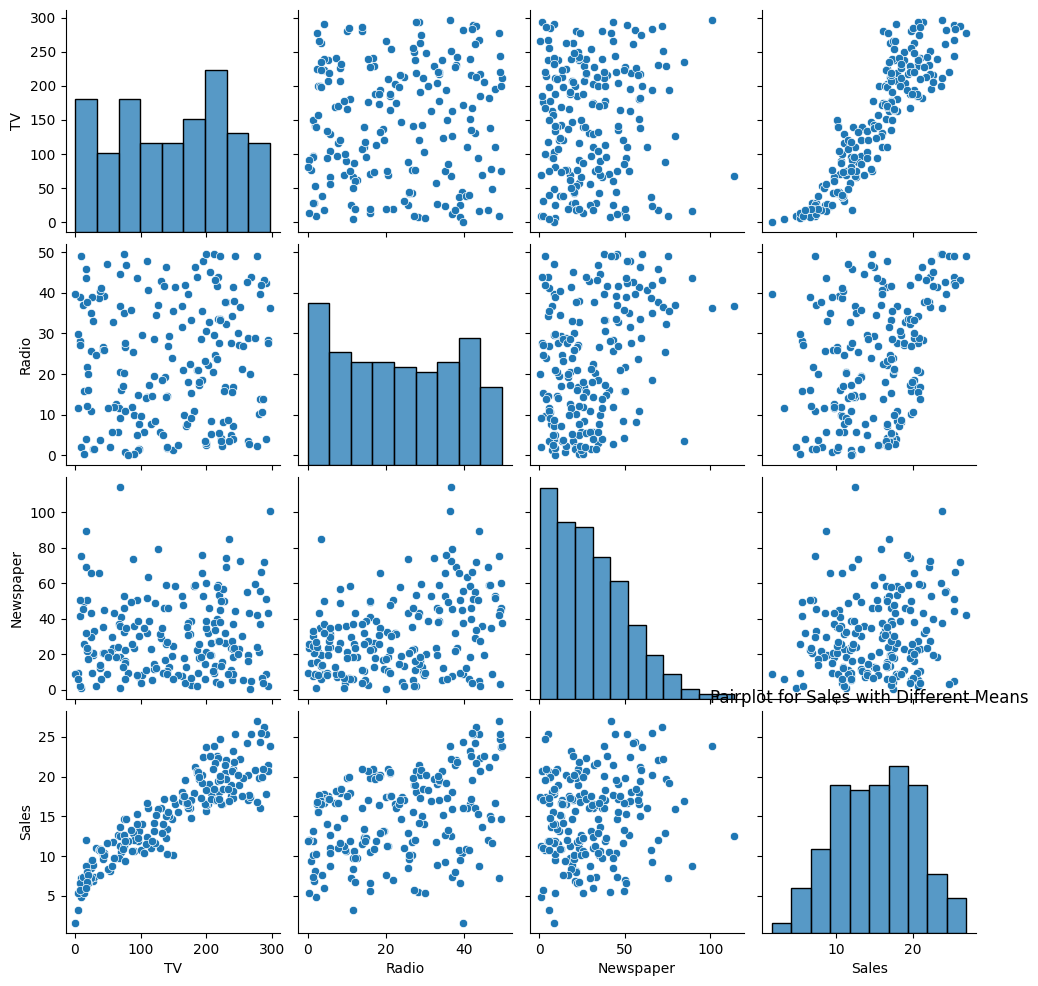

In [11]:
# Pairplot to show relationship of type of advertising and sales
sns.pairplot(data=sales_df, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.title (f'Pairplot for Sales with Different Means')
plt.show()

- There is a positive relationship between TV and sales. Advertising on TV leads to increase in sales. 

In [12]:
sales_performance = sales_df[['TV', 'Radio', 'Newspaper', 'Sales']].sum().sort_values(ascending=False)

print("Sales Performance Ranking:")
print(sales_performance)

Sales Performance Ranking:
TV           29408.5
Newspaper     6110.8
Radio         4652.8
Sales         3026.1
dtype: float64


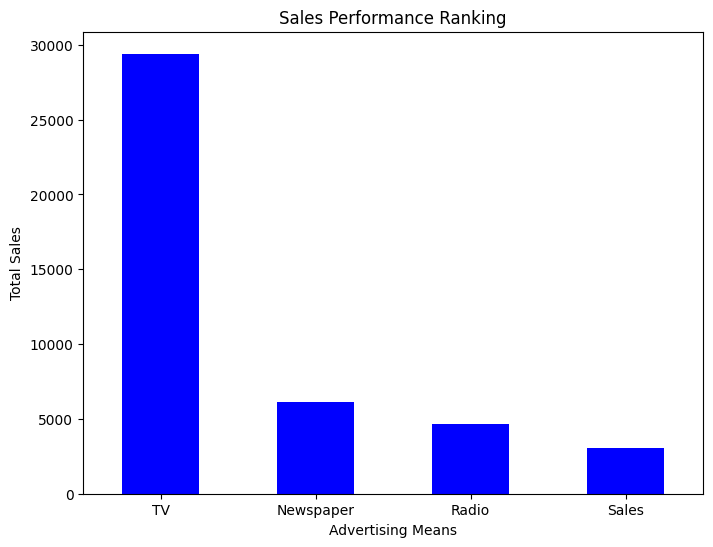

In [13]:
# Visualization of Sales Performance for each Advertising Type
plt.figure(figsize=(8, 6))
sales_performance.plot(kind='bar', color='blue')
plt.title('Sales Performance Ranking')
plt.xlabel('Advertising Means')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

- Advertising on TV results to more sales compared to other advertising channels.

__2.3.3 Bivariate Analysis__

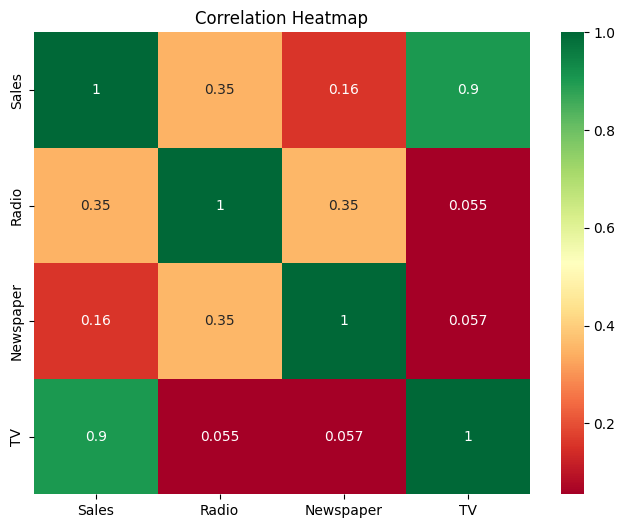

In [14]:
# Heatmap for the dataset to show correlation 
correlation_matrix = sales_df[['Sales', 'Radio', 'Newspaper', 'TV']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

- Tv advertising has a higher impact on sales followed by radio and finally newpaper.  

__2.4 Hypothesis Testing__

In [15]:
# Perform one-way ANOVA
alpha = 0.05  # significance level

# Perform ANOVA to test the overall effect of the advertising channels on sales
f_stat, p_value = stats.f_oneway(sales_df['TV'], sales_df['Radio'], sales_df['Newspaper'])
print("Overall ANOVA results:")
print("P-values:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: Advertising channels have a significant impact on sales.")
else:
    print("Fail to reject null hypothesis: No significant evidence that advertising channels affect sales.")

# Perform individual ANOVA tests between each advertising channel and sales
for channel in ['TV', 'Radio', 'Newspaper']:
    f_stat_channel, p_value_channel = stats.f_oneway(sales_df[channel], sales_df['Sales'])
    print(f"ANOVA results for {channel}:")
    print("P-value:", p_value_channel)
    
    if p_value_channel < alpha:
        print(f"Reject null hypothesis: Advertising on {channel} has a significant impact on sales.")
    else:
        print(f"Fail to reject null hypothesis: No significant evidence that advertising on {channel} affects sales.")

Overall ANOVA results:
P-values: 4.552931539744962e-103
Reject null hypothesis: Advertising channels have a significant impact on sales.
ANOVA results for TV:
P-value: 2.0375418721383258e-69
Reject null hypothesis: Advertising on TV has a significant impact on sales.
ANOVA results for Radio:
P-value: 1.5877669340000781e-12
Reject null hypothesis: Advertising on Radio has a significant impact on sales.
ANOVA results for Newspaper:
P-value: 3.1811618090567233e-20
Reject null hypothesis: Advertising on Newspaper has a significant impact on sales.


#### __3. Data Preparation__ 

In [16]:
# Check the data types of each column in sales_df
data_types = sales_df.dtypes
print(data_types)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


#### __3.1 Split Dataset into Training and Evaluation__

- X = input_data
- y = label

In [17]:
X = sales_df.drop(columns=['Sales'])
y = sales_df['Sales']

In [18]:
X.head ()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [20]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### __3.2 Model Building__ 

In [21]:
# Comparison of performance of different Models using MSE

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Print MSE for each model
print("Linear Regression MSE:", linear_mse)
print("Decision Tree Regression MSE:", dt_mse)
print("Random Forest Regression MSE:", rf_mse)


Linear Regression MSE: 2.9077569102710905
Decision Tree Regression MSE: 3.4019999999999997
Random Forest Regression MSE: 1.4374328500000009


- The best performing model to predict sales is Random Forest Regression because it has the lowest MSE. 

In [27]:
# Saving the best model (Random Forest)
joblib.dump(rf_model, 'best_random_forest_model.pkl')

print("Random Forest Regression MSE:", rf_mse)

Random Forest Regression MSE: 1.457150413745201
